# Paso 1: Cargar los datos

In [1]:
import sys
import os
import yaml

# Obtener el directorio de trabajo actual (en este caso estás en 'notebooks')
current_dir = os.getcwd()

# Construir la ruta relativa al nivel raíz del proyecto, que está un nivel arriba de 'notebooks'
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Cambiar el directorio de trabajo al nivel raíz del proyecto
os.chdir(project_root)

# Agregar la ruta al directorio 'src' para poder importar las funciones
sys.path.append(os.path.join(project_root, 'src'))

# Importar las funciones desde model_functions.py
from src import model_functions as mf

# Aquí iría el código para correr el modelo o cualquier lógica que estés implementando.


In [2]:
# Cargar el archivo de configuración YAML (puedes cambiar entre simple y complejo)
with open('configs/config_simple_model.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)['model']

# 1. Cargar los datos

In [3]:
# 1. Cargar los datos
X, y = mf.load_data()

# 2. Dividir los datos en entrenamiento, validación y prueba

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = mf.split_data(X, y)

# 3. Convertir los datos a tensores antes del entrenamiento

In [5]:
X_train_tensor, y_train_tensor = mf.convert_to_tensor(X_train, y_train)
X_val_tensor, y_val_tensor = mf.convert_to_tensor(X_val, y_val)
X_test_tensor, y_test_tensor = mf.convert_to_tensor(X_test, y_test)

# 4. Crear el modelo


In [6]:
print(config)


{'input_size': 57, 'hidden_layers': [10], 'output_size': 10, 'activation_function': 'Tanh', 'output_activation': 'Sigmoid', 'loss_function': 'MSELoss', 'learning_rate': 0.01, 'optimizer': 'SGD', 'epochs': 1000}


In [7]:
modelo = mf.build_model(config)


# 5. Entrenar el modelo


Epoch [10/1000], Loss Entrenamiento: 0.2837
Epoch [20/1000], Loss Entrenamiento: 0.2792
Epoch [30/1000], Loss Entrenamiento: 0.2749
Epoch [40/1000], Loss Entrenamiento: 0.2706
Epoch [50/1000], Loss Entrenamiento: 0.2664
Epoch [60/1000], Loss Entrenamiento: 0.2622
Epoch [70/1000], Loss Entrenamiento: 0.2582
Epoch [80/1000], Loss Entrenamiento: 0.2542
Epoch [90/1000], Loss Entrenamiento: 0.2503
Epoch [100/1000], Loss Entrenamiento: 0.2464
Epoch [110/1000], Loss Entrenamiento: 0.2427
Epoch [120/1000], Loss Entrenamiento: 0.2390
Epoch [130/1000], Loss Entrenamiento: 0.2354
Epoch [140/1000], Loss Entrenamiento: 0.2319
Epoch [150/1000], Loss Entrenamiento: 0.2285
Epoch [160/1000], Loss Entrenamiento: 0.2251
Epoch [170/1000], Loss Entrenamiento: 0.2219
Epoch [180/1000], Loss Entrenamiento: 0.2186
Epoch [190/1000], Loss Entrenamiento: 0.2155
Epoch [200/1000], Loss Entrenamiento: 0.2125
Epoch [210/1000], Loss Entrenamiento: 0.2095
Epoch [220/1000], Loss Entrenamiento: 0.2066
Epoch [230/1000], L

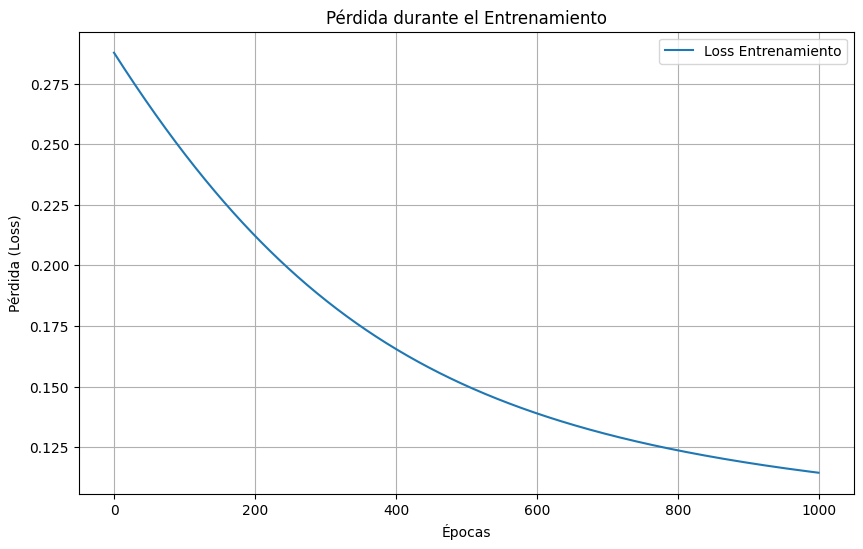

In [10]:
modelo_entrenado = mf.train_model(modelo, X_train_tensor, y_train_tensor, config)

# 6. Evaluar el modelo en el conjunto de prueba

In [13]:
mf.evaluate_model(modelo_entrenado, X_test_tensor, y_test_tensor, config)

Loss en el conjunto de prueba: 0.1159


# 7. Guardar el modelo entrenado


In [14]:
mf.save_model(modelo_entrenado)


Modelo guardado en models/model_final.pth
